<a href="https://colab.research.google.com/github/ethangoldbeck/grit-hub/blob/master/Crocs_Topic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asin Extraction


In [0]:
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/Topic Modeling/meta_Clothing_Shoes_and_Jewelry.json'

loadedjson = open(path, 'r')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from time import sleep

count = 0

allproducts = {}

for aline in loadedjson:
  count += 1
  if count % 100000 == 0:
    print(count)

  aproduct = eval(aline)
  allproducts[aproduct['asin']] = aproduct

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [0]:
len(allproducts)

1503384

In [0]:
allcategories = {}
count = 0

for aproduct in allproducts:
  count += 1
  if count % 100000 == 0:
    print(count/len(allproducts))
  aproduct = allproducts[aproduct]
  if 'categories' in aproduct:
    for categories in aproduct['categories']:
      for acategory in categories:
        if acategory in allcategories:
          allcategories[acategory] += 1
        if acategory not in allcategories:
          allcategories[acategory] = 1

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518


In [0]:
allcategories['Nike']
allcategories['adidas']
allcategories['crocs']
##min 1500 products

5089

In [0]:
sortedlist = []

for acategory in allcategories:
  sortedlist.append((allcategories[acategory], acategory))

In [0]:
sorted(sortedlist, reverse = True)

[(3429257, 'Clothing, Shoes & Jewelry'),
 (1086181, 'Women'),
 (617092, 'Clothing'),
 (541681, 'Men'),
 (537761, 'Novelty, Costumes & More'),
 (432653, 'Shoes'),
 (339900, 'Novelty'),
 (268065, 'Shoes & Accessories: International Shipping Available'),
 (255454, 'Jewelry'),
 (174962, 'Accessories'),
 (97095, 'Girls'),
 (93596, 'Tops & Tees'),
 (87688, 'Dresses'),
 (84549, 'T-Shirts'),
 (82063, 'Boots'),
 (80302, 'Shirts'),
 (79897, 'Sandals'),
 (79545, 'Watches'),
 (77684, 'Boys'),
 (73507, 'Jewelry: International Shipping Available'),
 (72372, 'Athletic'),
 (71414, 'Wrist Watches'),
 (70335, 'Sports & Outdoors'),
 (59763, 'Petite'),
 (58350, 'Fashion'),
 (53826, 'Costumes & Accessories'),
 (53021, 'Earrings'),
 (51728, 'Baby'),
 (50943, 'Comfort Shoes'),
 (50662, 'Casual'),
 (50357, 'Boot Shop'),
 (50124, 'C'),
 (49599, 'Active'),
 (49491, 'Band & Music Fan'),
 (46004, 'New Arrivals'),
 (43722, 'Necklaces & Pendants'),
 (43410, 'Intimates'),
 (43100, 'S'),
 (41709, 'Lingerie, Sleep & L

In [0]:
allcrocsasins = set()
count = 0

for areview in allproducts:
  theproduct = allproducts[areview]
  count += 1
  if count % 100000 == 0:
    print(count/1503384)
  for categories in theproduct['categories']:
    for acategory in categories:
      if 'crocs' in acategory.lower():
        allcrocsasins.add(theproduct['asin'])

print(len(allcrocsasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
5089


In [0]:
#outputfile = open('drive/My Drive/Colab Notebooks/Topic Modeling/crocsasins.txt', 'w')

#outputfile.write(','.join(allcrocsasins))
#outputfile.close()

# Review Extraction

In [0]:
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/Topic Modeling/Goldbeck reviews_Clothing_Shoes_and_Jewelry.json'

loadedjson = open(path, 'r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
count = 0 
allreviews = {}
for aline in loadedjson:
  count += 1
  if count % 100000 == 0:
    print(count)
  areview = eval(aline)
  allreviews[count] = areview

print(len(allreviews))

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5748920


In [0]:
from time import sleep


allcrocsasins = []

for data in open('drive/My Drive/Colab Notebooks/Topic Modeling/crocsasins.txt', 'r'):
  asins = data.split(',')
  for anasin in asins:
    allcrocsasins.append(anasin)
print(allcrocsasins)
len(allcrocsasins)

['B0076SP84W', 'B005HTPGSU', 'B006YFVMHU', 'B00B4BDACO', 'B00E59C0CI', 'B006Y4QDVQ', 'B007YBMJ7A', 'B008KYWLFA', 'B0036FU40W', 'B00E9C83HW', 'B006TQMIB8', 'B006Z6OPC2', 'B008EH6154', 'B000ZKA8HA', 'B008M3HFDW', 'B005CMHXOC', 'B006Z18UKU', 'B006VB6QHI', 'B0058RRE54', 'B00133C6WI', 'B005EU60UK', 'B00AQDLDHU', 'B005D6SBDO', 'B004IZ56GQ', 'B00DU9DUKA', 'B001U88EZE', 'B003Y3D9AS', 'B0076SP3CO', 'B0076SNZC4', 'B004S5VDWM', 'B008M0W8FU', 'B00AQDKCI6', 'B0017ZKYDA', 'B0036OSH66', 'B0017ZHEXS', 'B003YBWTGA', 'B00DURHR24', 'B006TAJHK4', 'B00AR7TZG6', 'B008J0Y91Y', 'B001U88STQ', 'B002JIO81I', 'B005ESFDEQ', 'B008MIVIIK', 'B002JIO8W2', 'B003NX73NS', 'B003YBWNCK', 'B00CN7VTQW', 'B001U887TC', 'B0036FU2GS', 'B007YBMII0', 'B002JCSQ3K', 'B004J25SDY', 'B002JVX9X8', 'B0019ZFC4E', 'B001U889RC', 'B00406X3JA', 'B005D6QW3A', 'B008M3HE0Q', 'B006WW51KO', 'B007RG8FUM', 'B001IV5BYK', 'B005CG0476', 'B00CM2MXNQ', 'B008OQUW3W', 'B002KAOG9E', 'B004022DMM', 'B004J2JPMO', 'B0070CF0ME', 'B00B4QKMT8', 'B00DY9TA2S', 'B00C

5089

In [0]:
crocsreviews = {}
count = 0
for areview in allreviews:
  count += 1
  if count % 100000 == 0:
    print(count/5748920)
  
  thereview = allreviews[areview]
  theasin = thereview['asin']
  reviewworld = thereview['reviewerID']
  if theasin in allcrocsasins:
    thekey = '%s.%s' % (theasin, reviewworld)
    crocsreviews[thekey] = thereview

0.017394571502125616
0.03478914300425123
0.05218371450637685
0.06957828600850247
0.08697285751062808
0.1043674290127537
0.12176200051487931
0.13915657201700493
0.15655114351913055
0.17394571502125616
0.19134028652338178
0.2087348580255074
0.226129429527633
0.24352400102975863
0.2609185725318843
0.27831314403400986
0.2957077155361355
0.3131022870382611
0.33049685854038674
0.34789143004251233
0.365286001544638
0.38268057304676356
0.4000751445488892
0.4174697160510148
0.43486428755314044
0.452258859055266
0.46965343055739167
0.48704800205951726
0.5044425735616429
0.5218371450637685
0.5392317165658941
0.5566262880680197
0.5740208595701454
0.591415431072271
0.6088100025743965
0.6262045740765222
0.6435991455786478
0.6609937170807735
0.678388288582899
0.6957828600850247
0.7131774315871503
0.730572003089276
0.7479665745914015
0.7653611460935271
0.7827557175956528
0.8001502890977784
0.8175448605999039
0.8349394321020296
0.8523340036041552
0.8697285751062809
0.8871231466084064
0.904517718110532


In [0]:
import json

#json.dump(crocsreviews, open('drive/My Drive/Colab Notebooks/Topic Modeling/allcrocsreviews.json', 'w'))

# Crocs Topic Modeling

In [0]:
import pickle
import json


from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/Topic Modeling/allcrocsreviews.json'

loadedjson = open(path, 'r')

crocsdata = json.load(loadedjson)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ids = []
for identifier in crocsdata:
  ids.append(identifier)

In [0]:
crocsdata['B0007UQFW0.A2QDBJ7WTY854J']['overall'] 

2.0

In [0]:
reviews1 = []
reviews2 = []
reviews3 = []
reviews4 = []
reviews5 = []
for i in ids:
  if crocsdata[i]['overall'] == 1:
    reviews1.append(crocsdata[i]['reviewText'])
  if crocsdata[i]['overall'] == 2:
    reviews2.append(crocsdata[i]['reviewText'])
  if crocsdata[i]['overall'] == 3:
    reviews3.append(crocsdata[i]['reviewText'])
  if crocsdata[i]['overall'] == 4:
    reviews4.append(crocsdata[i]['reviewText'])
  if crocsdata[i]['overall'] == 5:
    reviews5.append(crocsdata[i]['reviewText'])

In [0]:
len(reviews5)

30370

In [0]:
!pip install tmtoolkit

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     |████████████████████████████████| 19.9MB 1.3MB/s 
     |████████████████████████████████| 112kB 47.7MB/s 
     |████████████████████████████████| 2.3MB 42.7MB/s 
     |████████████████████████████████| 1.5MB 32.5MB/s 
     |████████████████████████████████| 22.1MB 186kB/s 
     |████████████████████████████████| 3.0MB 59.7MB/s 
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19528 sha256=3bf7ec969d5a38e2a9c1125f1b7757ea97a8f5fe02ee13056700fa2af4bca3e8
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449906 sha256=6355bfc1b0127710127c01c01841c08617c5b8520c05fa7e135b462a1f3e7312
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built globre nltk
  Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
  Foun

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import random
random.seed(20191120)

import numpy as np
np.set_printoptions(precision=5)

from tmtoolkit.corpus import Corpus
import codecs
import csv
import urllib

corpus1 = Corpus()
corpus2 = Corpus()
corpus3 = Corpus()
corpus4 = Corpus()
corpus5 = Corpus()


for i, line in enumerate(reviews1):
    corpus1.add_doc(str(i), line)
for i, line in enumerate(reviews2):
    corpus2.add_doc(str(i), line)
for i, line in enumerate(reviews3):
    corpus3.add_doc(str(i), line)
for i, line in enumerate(reviews4):
    corpus4.add_doc(str(i), line)
for i, line in enumerate(reviews5):
    corpus5.add_doc(str(i), line)

In [0]:
corpus5

<Corpus [30370 documents]>

(array([1.279e+03, 5.340e+02, 1.390e+02, 5.300e+01, 2.300e+01, 1.100e+01,
        4.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([   0. ,  298.6,  597.2,  895.8, 1194.4, 1493. , 1791.6, 2090.2,
        2388.8, 2687.4, 2986. ]),
 <a list of 10 Patch objects>)

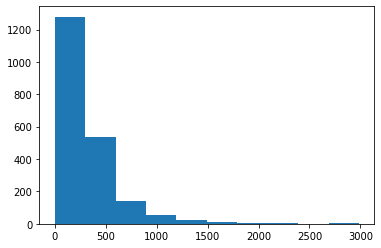

In [0]:
import matplotlib

matplotlib.pyplot.hist(corpus1.doc_lengths.values())

(array([1286.,  853.,  338.,  131.,   57.,   36.,   17.,    9.,    7.,
           3.]),
 array([   9. ,  215.1,  421.2,  627.3,  833.4, 1039.5, 1245.6, 1451.7,
        1657.8, 1863.9, 2070. ]),
 <a list of 10 Patch objects>)

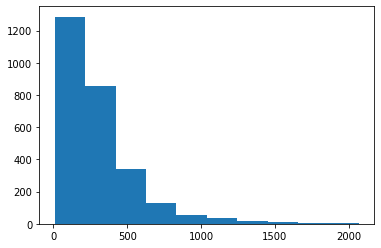

In [0]:
import matplotlib

matplotlib.pyplot.hist(corpus2.doc_lengths.values())

In [0]:
# \https://tmtoolkit.readthedocs.io/en/latest/preprocessing.html
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus1) #creating the preprocess data structure, then tagging parts of speech
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http', 'nt'])

<TMPreproc [2048 documents]>

In [0]:
preproc.vocabulary_size

6028

In [0]:
#preproc.stem()

In [0]:
preproc.tokens_datatable

,doc,position,token,meta_pos
0,0,0,i,PRP
1,0,1,go,VBD
2,0,2,to,TO
3,0,3,put,VB
4,0,4,my,PRP$
...,...,...,...,...
21,999,21,happen,VB
22,999,22,to,TO
23,999,23,anyone,NN
24,999,24,else,RB


In [0]:
preproc_smallerN = preproc.copy()
preproc_smallerN.filter_for_pos(list(['N']))
preproc_smallerN.clean_tokens(remove_numbers=True, remove_shorter_than=1)
preproc_smallerN.remove_common_tokens(df_threshold=.8)
preproc_smallerN.remove_uncommon_tokens(df_threshold=.0005)

preproc_smallerNadj = preproc.copy()
preproc_smallerNadj.filter_for_pos(list(['N','ADJ']))
preproc_smallerNadj.clean_tokens(remove_numbers=True, remove_shorter_than=1)
preproc_smallerNadj.remove_common_tokens(df_threshold=.8)
preproc_smallerNadj.remove_uncommon_tokens(df_threshold=.0005)


preproc_smaller = preproc.copy()
#preproc_smaller.filter_for_pos(list(['N']))
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=1)
preproc_smaller.remove_common_tokens(df_threshold=.8)
preproc_smaller.remove_uncommon_tokens(df_threshold=.0005)


preproc_smallerNadjV = preproc.copy()
preproc_smallerNadjV.filter_for_pos(list(['N', 'ADJ', 'V']))
preproc_smallerNadjV.clean_tokens(remove_numbers=True, remove_shorter_than=1)
preproc_smallerNadjV.remove_common_tokens(df_threshold=.5)
preproc_smallerNadjV.remove_uncommon_tokens(df_threshold=.0005)

print(preproc.vocabulary_size)
print(preproc_smallerN.vocabulary_size)
print(preproc_smallerNadj.vocabulary_size)
print(preproc_smaller.vocabulary_size)
print(preproc_smallerNadjV.vocabulary_size)

6028
1406
1805
2451
2208


In [0]:
preproc_smallerNadj = preproc.copy()
preproc_smallerNadj.filter_for_pos(list(['N','ADJ']))
preproc_smallerNadj.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smallerNadj.remove_common_tokens(df_threshold=.5)
preproc_smallerNadj.remove_uncommon_tokens(df_threshold=.0005)
print(preproc_smallerNadj.vocabulary_size)

1797


In [0]:
#preproc_smaller.tokens_datatable

In [0]:

vocab_N = np.array(preproc_smallerN.vocabulary)
vocab_Nadj = np.array(preproc_smallerNadj.vocabulary)
vocab_small = np.array(preproc_smaller.vocabulary)
vocab_all = np.array(preproc.vocabulary)
vocab_NadjV = np.array(preproc_smallerNadjV.vocabulary)

In [0]:

#dtm_smN = preproc_smallerN.dtm
dtm_smNadj = preproc_smallerNadj.dtm
#dtm_small = preproc_smaller.dtm
#dtm_all = preproc.dtm
#dtm_NadjV = preproc_smallerNadjV.dtm
#dtm_smN, dtm_smNadj, dtm_small, dtm_all
dtm_smNadj

<2048x1797 sparse matrix of type '<class 'numpy.int32'>'
	with 26520 stored elements in Compressed Sparse Row format>

In [0]:
!pip install tmtoolkit['lda'] # latent dialectic al

import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel


logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

dtms = {
    #'nouns': dtm_smN,
    'nounsadj': dtm_smNadj,
    #'small': dtm_small,
    #'NadjV' : dtm_NadjV,
    #'all': dtm_all
}

lda_params = {
    'n_topics': 12,
    'eta': 0.65,
    'n_iter': 1000,
    'random_state': 20191122
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

     |████████████████████████████████| 358kB 2.8MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 


In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_Nadj = models['nounsadj'][0][1]
print_ldamodel_topic_words(model_Nadj.topic_word_, vocab_Nadj, top_n=8)

topic_1
> #1. boot (0.054777)
> #2. foot (0.016077)
> #3. ankle (0.012255)
> #4. sock (0.009388)
> #5. opening (0.006999)
> #6. son (0.006522)
> #7. snow (0.005566)
> #8. warm (0.005566)
topic_2
> #1. horrible (0.007103)
> #2. smell (0.006494)
> #3. chemical (0.004055)
> #4. black (0.004055)
> #5. ankle (0.003445)
> #6. thin (0.003445)
> #7. fee (0.003445)
> #8. summer (0.003445)
topic_3
> #1. crocs (0.068297)
> #2. pair (0.063282)
> #3. shoe (0.036918)
> #4. year (0.021873)
> #5. old (0.015998)
> #6. time (0.014135)
> #7. first (0.013419)
> #8. croc (0.013275)
topic_4
> #1. size (0.162015)
> #2. shoe (0.052400)
> #3. crocs (0.043104)
> #4. small (0.035888)
> #5. pair (0.027425)
> #6. big (0.025204)
> #7. order (0.020903)
> #8. large (0.013410)
topic_5
> #1. color (0.034433)
> #2. clog (0.014861)
> #3. black (0.014861)
> #4. crocs (0.013951)
> #5. white (0.009399)
> #6. men (0.009399)
> #7. thing (0.008033)
> #8. blue (0.008033)
topic_6
> #1. shoe (0.080147)
> #2. foot (0.043256)
> #3.

In [0]:
#from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

#model_sm = models['small'][0][1]
#print_ldamodel_topic_words(model_sm.topic_word_, vocab_small, top_n=8)

In [0]:
#from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

#model_N = models['nouns'][0][1]
#print_ldamodel_topic_words(model_N.topic_word_, vocab_N, top_n=8)

In [0]:
#from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

#model_all = models['all'][0][1]
#print_ldamodel_topic_words(model_all.topic_word_, vocab_all, top_n=8)

In [0]:
#from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

#model_NadjV = models['NadjV'][0][1]
#print_ldamodel_topic_words(model_NadjV.topic_word_, vocab_all, top_n=8)

In [0]:
const_params = {'n_iter' : 1000, 'eta' : 0.65, 'random_state': 20191122}
ks = list(range(1,100,10))
print(ks)
varying_params = [dict(n_topics = k, alpha = 1/k) for k in ks]
print(varying_params)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 51, 'alpha': 0.0196078431372549}, {'n_topics': 61, 'alpha': 0.01639344262295082}, {'n_topics': 71, 'alpha': 0.014084507042253521}, {'n_topics': 81, 'alpha': 0.012345679012345678}, {'n_topics': 91, 'alpha': 0.01098901098901099}]


In [0]:
#model_bg = models['bigger'][0][1]
#print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg, top_n=3)

In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_smNadj, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)


[(1, {'cao_juan_2009': nan, 'arun_2010': 198.70576087828985, 'coherence_mimno_2011': -2.0450478005369295}), (11, {'cao_juan_2009': 0.28929038462050205, 'arun_2010': 143.37270616348763, 'coherence_mimno_2011': -6.647278378088647}), (21, {'cao_juan_2009': 0.5152799810446599, 'arun_2010': 171.4366222296811, 'coherence_mimno_2011': -14.753028935844554}), (31, {'cao_juan_2009': 0.6559842676184274, 'arun_2010': 186.93813945483643, 'coherence_mimno_2011': -17.95434806968347}), (41, {'cao_juan_2009': 0.7054278355368035, 'arun_2010': 196.53141264878272, 'coherence_mimno_2011': -19.11260560860897}), (51, {'cao_juan_2009': 0.7468669105269801, 'arun_2010': 190.19812451249055, 'coherence_mimno_2011': -20.283268041457458}), (61, {'cao_juan_2009': 0.7698116068341315, 'arun_2010': 195.2685970542068, 'coherence_mimno_2011': -20.24691771919548}), (71, {'cao_juan_2009': 0.8112364773703927, 'arun_2010': 203.56739841064106, 'coherence_mimno_2011': -20.41224601248961}), (81, {'cao_juan_2009': 0.842394940424

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b0a45e2b0>,
       dtype=object))

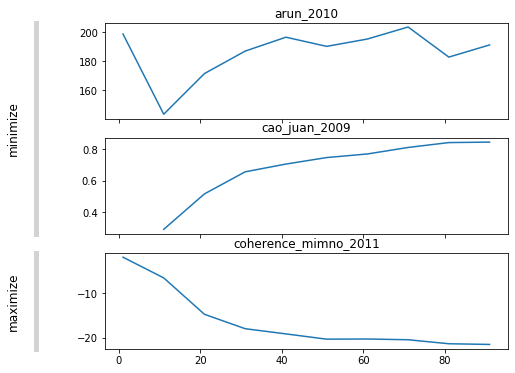

In [0]:
plot_eval_results(results_by_n_topics)

In [0]:
# \https://tmtoolkit.readthedocs.io/en/latest/preprocessing.html
from tmtoolkit.preprocess import TMPreproc

preproc2 = TMPreproc(corpus2) #creating the preprocess data structure, then tagging parts of speech
preproc2.pos_tag()
preproc2.lemmatize()
preproc2.tokens_to_lowercase()
preproc2.remove_special_chars_in_tokens()
preproc2.add_stopwords(['http', 'nt'])

<TMPreproc [2737 documents]>

In [0]:
preproc2.vocabulary_size

6113

In [0]:
#preproc.stem()

In [0]:
preproc2_smallerNadj = preproc2.copy()
preproc2_smallerNadj.filter_for_pos(list(['N','ADJ']))
preproc2_smallerNadj.clean_tokens(remove_numbers=True, remove_shorter_than=1)
preproc2_smallerNadj.remove_common_tokens(df_threshold=.1)
preproc2_smallerNadj.remove_uncommon_tokens(df_threshold=.0004)

print(preproc2_smallerNadj.vocabulary_size)


1873


In [0]:
#preproc_smaller.tokens_datatable

In [0]:
vocab_Nadj2 = np.array(preproc2_smallerNadj.vocabulary)


In [0]:
dtm_smNadj2 = preproc2_smallerNadj.dtm

dtm_smNadj2

<2737x1873 sparse matrix of type '<class 'numpy.int32'>'
	with 25752 stored elements in Compressed Sparse Row format>

In [0]:
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel


logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

dtms2 = {
    'nounsadj': dtm_smNadj2
}

lda_params = {
    'n_topics': 15,
    'eta': 0.35,
    'n_iter': 1000,
    'random_state': 20191122
}

models2 = compute_models_parallel(dtms2, constant_parameters=lda_params)

In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_Nadj2 = models2['nounsadj'][0][1]
print_ldamodel_topic_words(model_Nadj2.topic_word_, vocab_Nadj2, top_n=8)

topic_1
> #1. material (0.028265)
> #2. plastic (0.020893)
> #3. slipper (0.016747)
> #4. hard (0.016286)
> #5. sole (0.014904)
> #6. uncomfortable (0.013983)
> #7. rubber (0.013061)
> #8. house (0.010758)
topic_2
> #1. tight (0.034718)
> #2. little (0.033843)
> #3. front (0.027280)
> #4. look (0.020280)
> #5. nice (0.019842)
> #6. narrow (0.018529)
> #7. top (0.013279)
> #8. uncomfortable (0.012842)
topic_3
> #1. different (0.036159)
> #2. one (0.028880)
> #3. store (0.024877)
> #4. product (0.017961)
> #5. quality (0.017234)
> #6. amazon (0.017234)
> #7. problem (0.015050)
> #8. china (0.014322)
topic_4
> #1. amazon (0.041863)
> #2. order (0.027160)
> #3. return (0.026763)
> #4. croc (0.014842)
> #5. store (0.014047)
> #6. product (0.013252)
> #7. day (0.012458)
> #8. great (0.011663)
topic_5
> #1. flip (0.052888)
> #2. flop (0.047251)
> #3. great (0.015442)
> #4. disappointed (0.014234)
> #5. croc (0.013831)
> #6. thong (0.013428)
> #7. uncomfortable (0.012220)
> #8. bottom (0.00980

In [0]:
const_params = {'n_iter' : 1000, 'eta' : 0.35, 'random_state': 20191122}
ks = list(range(1,100,10))
print(ks)
varying_params = [dict(n_topics = k, alpha = 1/k) for k in ks]
print(varying_params)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 51, 'alpha': 0.0196078431372549}, {'n_topics': 61, 'alpha': 0.01639344262295082}, {'n_topics': 71, 'alpha': 0.014084507042253521}, {'n_topics': 81, 'alpha': 0.012345679012345678}, {'n_topics': 91, 'alpha': 0.01098901098901099}]


In [0]:
#eval_results2 = tm_lda.evaluate_topic_models(dtm_smNadj2, varying_params, const_params)

In [0]:


#results_by_n_topics2 = results_by_parameter(eval_results2, 'n_topics')
#print(results_by_n_topics2)


In [0]:
#plot_eval_results(results_by_n_topics2)

In [0]:
# \https://tmtoolkit.readthedocs.io/en/latest/preprocessing.html
from tmtoolkit.preprocess import TMPreproc

preproc3 = TMPreproc(corpus3) #creating the preprocess data structure, then tagging parts of speech
preproc3.pos_tag()
preproc3.lemmatize()
preproc3.tokens_to_lowercase()
preproc3.remove_special_chars_in_tokens()
preproc3.add_stopwords(['crocs', 'shoe'])

<TMPreproc [4437 documents]>

In [0]:
preproc3.vocabulary_size

7973

In [0]:
#preproc.stem()

In [0]:
preproc3_smallerNadj = preproc3.copy()
preproc3_smallerNadj.filter_for_pos(list(['N','ADJ']))
preproc3_smallerNadj.clean_tokens(remove_numbers=True, remove_shorter_than=4)
preproc3_smallerNadj.remove_common_tokens(df_threshold=.1)
preproc3_smallerNadj.remove_uncommon_tokens(df_threshold=.0003)

print(preproc3_smallerNadj.vocabulary_size)


2206


In [0]:
#preproc_smaller.tokens_datatable

In [0]:
vocab_Nadj3 = np.array(preproc3_smallerNadj.vocabulary)


In [0]:
dtm_smNadj3 = preproc3_smallerNadj.dtm

dtm_smNadj3

<4437x2206 sparse matrix of type '<class 'numpy.int32'>'
	with 34882 stored elements in Compressed Sparse Row format>

In [0]:
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel


logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

dtms3 = {
    'nounsadj': dtm_smNadj3
}

lda_params = {
    'n_topics': 10,
    'eta': 0.12,
    'n_iter': 1000,
    'random_state': 20191122
}

models3 = compute_models_parallel(dtms3, constant_parameters=lda_params)

In [0]:

model_Nadj3 = models3['nounsadj'][0][1]
print_ldamodel_topic_words(model_Nadj3.topic_word_, vocab_Nadj3, top_n=8)

topic_1
> #1. heel (0.046323)
> #2. back (0.035455)
> #3. blister (0.028283)
> #4. ankle (0.019588)
> #5. sandal (0.017197)
> #6. short (0.016545)
> #7. front (0.015893)
> #8. first (0.015458)
topic_2
> #1. amazon (0.042166)
> #2. store (0.033152)
> #3. order (0.031124)
> #4. return (0.022110)
> #5. product (0.017604)
> #6. sizing (0.016026)
> #7. problem (0.014674)
> #8. different (0.014224)
topic_3
> #1. work (0.029783)
> #2. month (0.020610)
> #3. hour (0.019267)
> #4. week (0.016135)
> #5. year (0.013674)
> #6. first (0.012779)
> #7. beach (0.012779)
> #8. long (0.012108)
topic_4
> #1. style (0.078768)
> #2. narrow (0.027523)
> #3. tight (0.022185)
> #4. flat (0.022185)
> #5. short (0.019516)
> #6. croc (0.019249)
> #7. perfect (0.014178)
> #8. woman (0.013644)
topic_5
> #1. boot (0.068351)
> #2. sock (0.042858)
> #3. warm (0.026798)
> #4. lining (0.022209)
> #5. winter (0.018130)
> #6. liner (0.017366)
> #7. nice (0.015071)
> #8. tight (0.014306)
topic_6
> #1. order (0.032988)
> #

In [0]:
const_params = {'n_iter' : 1000, 'eta' : 0.12, 'random_state': 20191122}
ks = list(range(1,50,10))
print(ks)
varying_params = [dict(n_topics = k, alpha = 1/k) for k in ks]
print(varying_params)

[1, 11, 21, 31, 41]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 41, 'alpha': 0.024390243902439025}]


In [0]:
#eval_results3 = tm_lda.evaluate_topic_models(dtm_smNadj3, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

#results_by_n_topics3 = results_by_parameter(eval_results3, 'n_topics')
#print(results_by_n_topics3)


In [0]:
#plot_eval_results(results_by_n_topics3)

In [0]:
preproc4 = TMPreproc(corpus4) #creating the preprocess data structure, then tagging parts of speech
preproc4.pos_tag()
preproc4.lemmatize()
preproc4.tokens_to_lowercase()
preproc4.remove_special_chars_in_tokens()
preproc4.add_stopwords(['shoe'])

<TMPreproc [9506 documents]>

In [0]:
preproc4.vocabulary_size

12405

In [0]:
#preproc.stem()

In [0]:
preproc4_smallerNadj = preproc4.copy()
preproc4_smallerNadj.filter_for_pos(list(['N','ADJ']))
preproc4_smallerNadj.clean_tokens(remove_numbers=True, remove_shorter_than=4)
preproc4_smallerNadj.remove_common_tokens(df_threshold=.1)
preproc4_smallerNadj.remove_uncommon_tokens(df_threshold=.0002)

print(preproc4_smallerNadj.vocabulary_size)


3508


In [0]:
vocab_Nadj4 = np.array(preproc4_smallerNadj.vocabulary)


In [0]:
dtm_smNadj4 = preproc4_smallerNadj.dtm

dtm_smNadj4

<9506x3508 sparse matrix of type '<class 'numpy.int32'>'
	with 82553 stored elements in Compressed Sparse Row format>

In [0]:
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel


logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

dtms4 = {
    'nounsadj': dtm_smNadj4
}

lda_params = {
    'n_topics': 11,
    'eta': 0.05,
    'n_iter': 1000,
    'random_state': 20191122
}

models4 = compute_models_parallel(dtms4, constant_parameters=lda_params)

In [0]:

model_Nadj4 = models4['nounsadj'][0][1]
print_ldamodel_topic_words(model_Nadj4.topic_word_, vocab_Nadj4, top_n=8)

topic_1
> #1. flip (0.059841)
> #2. flop (0.053772)
> #3. sandal (0.050617)
> #4. support (0.019304)
> #5. comfort (0.018454)
> #6. nice (0.016269)
> #7. style (0.015420)
> #8. year (0.015177)
topic_2
> #1. heel (0.037582)
> #2. support (0.036830)
> #3. arch (0.031784)
> #4. sock (0.024376)
> #5. work (0.022336)
> #6. pain (0.019008)
> #7. hour (0.016861)
> #8. flat (0.013318)
topic_3
> #1. wide (0.085832)
> #2. narrow (0.038526)
> #3. tight (0.027601)
> #4. width (0.027375)
> #5. large (0.024109)
> #6. sandal (0.020280)
> #7. style (0.018590)
> #8. strap (0.015662)
topic_4
> #1. easy (0.031993)
> #2. house (0.027423)
> #3. light (0.025392)
> #4. perfect (0.023742)
> #5. water (0.020315)
> #6. summer (0.018665)
> #7. nice (0.017269)
> #8. beach (0.015746)
topic_5
> #1. price (0.047491)
> #2. product (0.035474)
> #3. amazon (0.033861)
> #4. store (0.023603)
> #5. order (0.019792)
> #6. happy (0.019206)
> #7. quality (0.015249)
> #8. purchase (0.014370)
topic_6
> #1. sole (0.020358)
> #2

In [0]:
const_params = {'n_iter' : 1000, 'eta' : 0.05, 'random_state': 20191122}
ks = list(range(1,42,5))
print(ks)
varying_params = [dict(n_topics = k, alpha = 1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}]


In [0]:
eval_results4 = tm_lda.evaluate_topic_models(dtm_smNadj4, varying_params, const_params)

In [0]:


results_by_n_topics4 = results_by_parameter(eval_results4, 'n_topics')
print(results_by_n_topics4)


[(1, {'cao_juan_2009': nan, 'arun_2010': 487.0719939492384, 'coherence_mimno_2011': -2.5460215713302627}), (6, {'cao_juan_2009': 0.2915783673129496, 'arun_2010': 337.46683640047206, 'coherence_mimno_2011': -2.8847022138075906}), (11, {'cao_juan_2009': 0.22549468702589007, 'arun_2010': 286.15215532985314, 'coherence_mimno_2011': -2.937168609267249}), (16, {'cao_juan_2009': 0.17145715576931012, 'arun_2010': 247.9293481815552, 'coherence_mimno_2011': -3.324106284372478}), (21, {'cao_juan_2009': 0.16527221199379014, 'arun_2010': 227.8551948892966, 'coherence_mimno_2011': -3.2854625849466004}), (26, {'cao_juan_2009': 0.14720401963445978, 'arun_2010': 207.00928243951088, 'coherence_mimno_2011': -3.6295089353695116}), (31, {'cao_juan_2009': 0.14383227914335125, 'arun_2010': 195.0313169564608, 'coherence_mimno_2011': -3.502737776153921}), (36, {'cao_juan_2009': 0.13904909231227786, 'arun_2010': 186.40451955315373, 'coherence_mimno_2011': -3.8204032058044177}), (41, {'cao_juan_2009': 0.13516012

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b0a278048>,
       dtype=object))

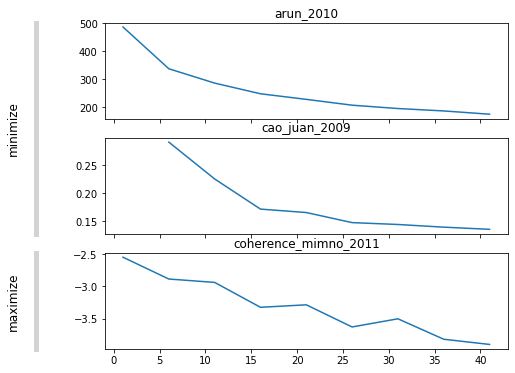

In [0]:
plot_eval_results(results_by_n_topics4)

In [0]:
preproc5 = TMPreproc(corpus5) #creating the preprocess data structure, then tagging parts of speech
preproc5.pos_tag()
preproc5.lemmatize()
preproc5.tokens_to_lowercase()
preproc5.remove_special_chars_in_tokens()
preproc5.add_stopwords(['shoe'])

<TMPreproc [30370 documents]>

In [0]:
preproc5.vocabulary_size

22886

In [0]:
#preproc.stem()

In [0]:
preproc5_smallerNadj = preproc5.copy()
preproc5_smallerNadj.filter_for_pos(list(['N','ADJ']))
preproc5_smallerNadj.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc5_smallerNadj.remove_common_tokens(df_threshold=.3)
preproc5_smallerNadj.remove_uncommon_tokens(df_threshold=.00005)

print(preproc5_smallerNadj.vocabulary_size)


7106


In [0]:
vocab_Nadj5 = np.array(preproc5_smallerNadj.vocabulary)


In [0]:
dtm_smNadj5 = preproc5_smallerNadj.dtm

dtm_smNadj5

<30370x7106 sparse matrix of type '<class 'numpy.int32'>'
	with 331511 stored elements in Compressed Sparse Row format>

In [0]:
!pip install tmtoolkit['lda'] # latent dialectic al

import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel


logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

dtms5 = {
    'nounsadj': dtm_smNadj5
}

lda_params = {
    'n_topics': 25,
    'eta': 0.15,
    'n_iter': 1000,
    'random_state': 20191122
}

models5 = compute_models_parallel(dtms5, constant_parameters=lda_params)

In [0]:

model_Nadj5 = models5['nounsadj'][0][1]
print_ldamodel_topic_words(model_Nadj5.topic_word_, vocab_Nadj5, top_n=8)

topic_1
> #1. cute (0.074955)
> #2. light (0.065596)
> #3. super (0.049730)
> #4. comfy (0.047756)
> #5. color (0.042345)
> #6. compliment (0.039640)
> #7. great (0.031012)
> #8. weight (0.030793)
topic_2
> #1. day (0.051496)
> #2. foot (0.036636)
> #3. sandal (0.033019)
> #4. great (0.027430)
> #5. trip (0.023879)
> #6. pair (0.023024)
> #7. time (0.019276)
> #8. summer (0.019013)
topic_3
> #1. great (0.053538)
> #2. casual (0.050027)
> #3. dress (0.037374)
> #4. jean (0.034657)
> #5. short (0.028695)
> #6. cute (0.025515)
> #7. summer (0.022733)
> #8. color (0.022402)
topic_4
> #1. color (0.113467)
> #2. pair (0.061635)
> #3. black (0.057820)
> #4. brown (0.029264)
> #5. one (0.029010)
> #6. blue (0.022141)
> #7. pink (0.018008)
> #8. different (0.016672)
topic_5
> #1. foot (0.038739)
> #2. sole (0.029456)
> #3. soft (0.021532)
> #4. good (0.019463)
> #5. light (0.019344)
> #6. nice (0.018635)
> #7. little (0.017157)
> #8. great (0.016033)
topic_6
> #1. foot (0.111839)
> #2. wide (0.

In [0]:
const_params = {'n_iter' : 1000, 'eta' : 0.15, 'random_state': 20191122}
ks = list(range(1,42,5))
print(ks)
varying_params = [dict(n_topics = k, alpha = 1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}]


In [0]:
#eval_results5 = tm_lda.evaluate_topic_models(dtm_smNadj5, varying_params, const_params)

In [0]:


#results_by_n_topics5 = results_by_parameter(eval_results5, 'n_topics')
#print(results_by_n_topics5)


In [0]:
#plot_eval_results(results_by_n_topics5)

# Topic Names and Classification

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words
print(model_Nadj)

doc_topic = model_Nadj.doc_topic_
doc_labels = np.array(preproc_smallerNadj.doc_labels)
topic_words = model_Nadj.topic_word_

doc_lengths_sm = doc_lengths(dtm_smNadj)

doc_topic2 = model_Nadj2.doc_topic_
doc_labels2 = np.array(preproc2_smallerNadj.doc_labels)
topic_words2 = model_Nadj2.topic_word_

doc_lengths_sm2 = doc_lengths(dtm_smNadj2)

doc_topic3 = model_Nadj3.doc_topic_
doc_labels3 = np.array(preproc3_smallerNadj.doc_labels)
topic_words3 = model_Nadj3.topic_word_

doc_lengths_sm3 = doc_lengths(dtm_smNadj3)

doc_topic4 = model_Nadj4.doc_topic_
doc_labels4 = np.array(preproc4_smallerNadj.doc_labels)
topic_words4 = model_Nadj4.topic_word_

doc_lengths_sm4 = doc_lengths(dtm_smNadj4)

doc_topic5 = model_Nadj5.doc_topic_
doc_labels5 = np.array(preproc5_smallerNadj.doc_labels)
topic_words5 = model_Nadj5.topic_word_

doc_lengths_sm5 = doc_lengths(dtm_smNadj5)


print(len(doc_topic))
print(len(doc_lengths_sm))

#remove uncommon words processing
topic_labels = generate_topic_labels_from_top_words(
    topic_words,
    doc_topic,
    doc_lengths_sm,
    vocab_Nadj,
    lambda_ = .1
)

topic_labels2 = generate_topic_labels_from_top_words(
    topic_words2,
    doc_topic2,
    doc_lengths_sm2,
    vocab_Nadj2,
    lambda_ = .1
)

topic_labels3 = generate_topic_labels_from_top_words(
    topic_words3,
    doc_topic3,
    doc_lengths_sm3,
    vocab_Nadj3,
    lambda_ = .1
)

topic_labels4 = generate_topic_labels_from_top_words(
    topic_words4,
    doc_topic4,
    doc_lengths_sm4,
    vocab_Nadj4,
    lambda_ = .1
)

topic_labels5 = generate_topic_labels_from_top_words(
    topic_words5,
    doc_topic5,
    doc_lengths_sm5,
    vocab_Nadj5,
    lambda_ = .1
)

#lower lambda more words
documentclassifications = ldamodel_top_doc_topics(doc_topic, doc_labels, top_n = 2, topic_labels=topic_labels)

for index, arow in documentclassifications.iterrows():
  documentclassifications.set_value(index, 'text', corpus1[index])

documentclassifications2 = ldamodel_top_doc_topics(doc_topic2, doc_labels2, top_n = 2, topic_labels=topic_labels2)

for index, arow in documentclassifications2.iterrows():
  documentclassifications2.set_value(index, 'text', corpus2[index])  

documentclassifications3 = ldamodel_top_doc_topics(doc_topic3, doc_labels3, top_n = 2, topic_labels=topic_labels3)

for index, arow in documentclassifications3.iterrows():
  documentclassifications3.set_value(index, 'text', corpus3[index])  

documentclassifications4 = ldamodel_top_doc_topics(doc_topic4, doc_labels4, top_n = 2, topic_labels=topic_labels4)

for index, arow in documentclassifications4.iterrows():
  documentclassifications4.set_value(index, 'text', corpus4[index])  

documentclassifications5 = ldamodel_top_doc_topics(doc_topic5, doc_labels5, top_n = 2, topic_labels=topic_labels5)

for index, arow in documentclassifications5.iterrows():
  documentclassifications5.set_value(index, 'text', corpus5[index]) 


2048
2048


In [0]:
documentclassifications

,rank_1,rank_2,text
document,,,
0,7_customer (0.3649),4_size (0.3649),I went to put my crocs on and could not fit in...
1,7_customer (0.698),4_size (0.1535),BUYER BEWARE: Unless you're never going to acc...
10,3_old (0.6302),12_relief (0.1615),I was very dissapointed with this product. I ...
100,11_wide (0.3387),8_flop (0.3387),The button on the side popped off as soon as I...
1000,8_flop (0.8125),6_hour (0.09821),"I have worn Crocs sandals for years, and loved..."
...,...,...,...
995,8_flop (0.9225),12_relief (0.007042),I really liked these flip flops. They fit well...
996,8_flop (0.6287),7_customer (0.261),I have had 3 other pairs of Crocs Sandal (this...
997,3_old (0.936),12_relief (0.005814),On third day the strap broke. Am awaiting a re...


In [0]:
documentclassifications2

,rank_1,rank_2,text
document,,,
0,5_flip (0.7495),15_floor (0.1341),I discovered today what many people apparently...
1,15_floor (0.6276),9_left (0.2828),I've had my pair for only three weeks. I went ...
10,8_blister (0.408),15_floor (0.168),I wore these shoes for 1 day working in the ga...
100,3_mexico (0.4519),10_men (0.2296),"These Crocs are one size too big, very inconsi..."
1000,9_left (0.6),11_sandal (0.2471),I was somewhat disappointed with this sandal. ...
...,...,...,...
995,12_color (0.8133),15_floor (0.01333),This product belongs on feet bigger than mine ...
996,2_front (0.4969),8_blister (0.1876),(This is my wife's review) These were tight ac...
997,15_floor (0.7043),12_color (0.09565),My wife has had 2 pair of Cleos that she wore ...


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('sun')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

#.36 cutoff

Results:
["BUYER BEWARE: Unless you're never going to accidently leave these out in the sun or in your car on a hot day, don't buy them.  They shrink up like a wool sweater in the dryer. My pair shrunk almost 2 sizes. They're worthless to me now.I hope word of mouth spreads about this shrinkage problem and Crocs either improves their warranty or goes out of business.", '7_customer (0.698)']


In [0]:
documentclassifications.to_excel('drive/My Drive/Colab Notebooks/Topic Modeling/crocstopic.documentclassifications1.xlsx')
documentclassifications2.to_excel('drive/My Drive/Colab Notebooks/Topic Modeling/crocstopic.documentclassifications2.xlsx')
documentclassifications3.to_excel('drive/My Drive/Colab Notebooks/Topic Modeling/crocstopic.documentclassifications3.xlsx')
documentclassifications4.to_excel('drive/My Drive/Colab Notebooks/Topic Modeling/crocstopic.documentclassifications4.xlsx')
documentclassifications5.to_excel('drive/My Drive/Colab Notebooks/Topic Modeling/crocstopic.documentclassifications5.xlsx')
